In [17]:
import os 
import pandas as pd 
import numpy as np

# exploring a one of 22 files (11 corn, 11 soybean)
test_file_dir = '/Users/bendevera/Desktop/development/data_science/Corn-&-Soybean-Prices/data/USDAProj_Corn_2007to2008.csv'
test_df = pd.read_csv(test_file_dir)

test_df.head()

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,90.5,82.9,150.3,937.0,12460.0,15.0,13412.0,5700.0,4790.0,...,21.35,0.24,1.95,10.42,55.37,3.5,45.3,60.3,0.3,8.69
1,2007/06/11,90.5,82.9,150.3,987.0,12460.0,15.0,13462.0,5700.0,4790.0,...,21.35,0.24,1.95,10.72,55.72,3.5,45.8,60.8,0.3,8.84
2,2007/07/12,92.9,85.4,150.3,1137.0,12840.0,15.0,13992.0,5700.0,4790.0,...,21.35,0.24,1.97,10.72,55.23,3.5,45.8,60.8,0.3,8.35
3,2007/08/10,92.9,85.4,152.8,1137.0,13054.0,15.0,14206.0,5750.0,4790.0,...,21.35,0.24,1.92,10.72,48.43,6.0,45.8,60.8,0.3,4.05
4,2007/09/12,92.9,85.4,155.8,1142.0,13308.0,15.0,14465.0,5850.0,4690.0,...,21.35,0.24,1.77,10.62,46.94,8.0,46.5,61.5,0.3,3.76


In [18]:
# okay, so a lot of columns. Lets see this things shape. 
test_df.shape

(24, 113)

In [19]:
# 113 columns per entry! Okay, lets see what these columns even are.
for column in test_df.columns:
    print(column)

Date
Area Planted
Area Harvested
Yield
Beginning Stocks
Production
Imports
Total Supply
Feed and Residual
FSI
Ethanol
Total Domestic
Exports
Total Use
Ending Stocks
World BeginningStocks
World Production
World Imports
World DomesticFeed
World DomesticTotal
World Exports
World EndingStocks
United States BeginningStocks
United States Production
United States Imports
United States DomesticFeed
United States DomesticTotal
United States Exports
United States EndingStocks
Argentina BeginningStocks
Argentina Production
Argentina Imports
Argentina DomesticFeed
Argentina DomesticTotal
Argentina Exports
Argentina EndingStocks
Brazil BeginningStocks
Brazil Production
Brazil Imports
Brazil DomesticFeed
Brazil DomesticTotal
Brazil Exports
Brazil EndingStocks
China BeginningStocks
China Production
China Imports
China DomesticFeed
China DomesticTotal
China Exports
China EndingStocks
Japan BeginningStocks
Japan Production
Japan Imports
Japan DomesticFeed
Japan DomesticTotal
Japan Exports
Japan EndingS

Each observation includes a "Date" and the following metrics for a number of regions: "BeginningStocks", "Production", "Imports", "DomesticFeed", "Exports", "EndingStocks". The regions that each have a value for those previously listed metrics are:
- World
- US
- Argentina
- Brazil
- China 
- Japan
- Mexico
- South Korea
- South Africa
- Canada
- Ukraine
- Egypt
- Southeast Asia
- EU

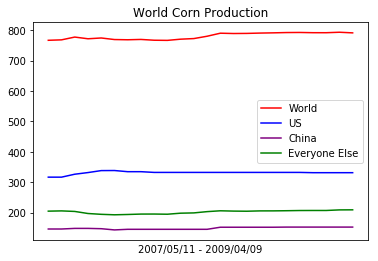

In [20]:
# trying to visualize some of these metrics
import matplotlib.pyplot as plt 

plt.plot(test_df['Date'].values, test_df['World Production'].values, color='red', label='World')
plt.plot(test_df['Date'].values, test_df['United States Production'].values, color='blue', label='US')
plt.plot(test_df['Date'].values, test_df['China Production'].values, color='purple', label='China')

# Saw how minimal the production of these regions was to US, China and the world so decided to group them.
# plt.plot(test_df['Date'].values, test_df['Southeast Asia Production'].values, color='green', label='Southeast Asia')
# plt.plot(test_df['Date'].values, test_df['European Union Production'].values, color='purple', label='EU')
# plt.plot(test_df['Date'].values, test_df['Egypt Production'].values, color='orange', label='Egypt')
# plt.plot(test_df['Date'].values, test_df['Ukraine Production'].values, color='black', label='Ukraine')
# plt.plot(test_df['Date'].values, test_df['Canada Production'].values, label='Canada')
# plt.plot(test_df['Date'].values, test_df['South Africa Production'].values, label='South Africa')
# plt.plot(test_df['Date'].values, test_df['South Korea Production'].values, label='South Korea')
# plt.plot(test_df['Date'].values, test_df['Mexico Production'].values, label='Mexico')
# plt.plot(test_df['Date'].values, test_df['Japan Production'].values, label='Japan')
# plt.plot(test_df['Date'].values, test_df['Brazil Production'].values, label='Brazil')
# plt.plot(test_df['Date'].values, test_df['Argentina Production'].values, label='Argentina')
plt.plot(test_df['Date'].values, 
        test_df['Southeast Asia Production'].values + test_df['European Union Production'].values + test_df['Egypt Production'].values
        + test_df['Ukraine Production'].values + test_df['Canada Production'].values + test_df['South Africa Production'].values + 
        test_df['South Korea Production'].values + test_df['Mexico Production'].values + test_df['Japan Production'].values + 
        test_df['Brazil Production'].values + test_df['Argentina Production'].values, color='green', label='Everyone Else')
plt.legend()
plt.title('World Corn Production')
plt.gca().axes.get_xaxis().set_ticks([])
plt.xlabel('2007/05/11 - 2009/04/09')
plt.show()

In [21]:
# concatenating all Corn files because there are 11 files spanning from 2007-2018
base_dir = '/Users/bendevera/Desktop/development/data_science/Corn-&-Soybean-Prices/data/'
year = 2008
frames = []
while year < 2019:
    filename = base_dir + "USDAProj_Corn_" + str(year-1) + "to" + str(year) + ".csv"
    curr_df = pd.read_csv(filename)
    frames.append(curr_df)
    year += 1
df = pd.concat(frames)
df.shape

(248, 113)

In [22]:
# for row in df.iterrows():
#    print(row[1]['Date'])
# dates = df["Date"]
# df[dates.isin(dates[dates.duplicated()])]
# dates.duplicated().count()
# df.sort_values(by="Date")

# cleaning up this data a bit

# sorting by Date
df.sort_values("Date", inplace = True) 
  
# dropping all duplicate values 
df.drop_duplicates(keep = False, inplace = True) 

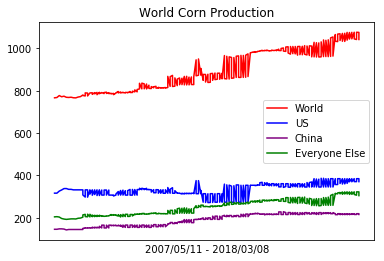

In [23]:
# same visualization as before but with the entire dataset
plt.plot(df['Date'].values, df['World Production'].values, color='red', label='World')
plt.plot(df['Date'].values, df['United States Production'].values, color='blue', label='US')
plt.plot(df['Date'].values, df['China Production'].values, color='purple', label='China')

plt.plot(df['Date'].values, 
        df['Southeast Asia Production'].values + df['European Union Production'].values + df['Egypt Production'].values
        + df['Ukraine Production'].values + df['Canada Production'].values + df['South Africa Production'].values + 
        df['South Korea Production'].values + df['Mexico Production'].values + df['Japan Production'].values + 
        df['Brazil Production'].values + df['Argentina Production'].values, color='green', label='Everyone Else')
plt.legend()
plt.title('World Corn Production')
plt.gca().axes.get_xaxis().set_ticks([])
plt.xlabel('2007/05/11 - 2018/03/08')
plt.show()